In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [34]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()

first_row = session.query(Measurement).first()
first_row.__dict__

# reflect the tables
for row in session.query(Measurement.date, Measurement.prcp).limit(10).all():
    print(row)

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)


In [20]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [22]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

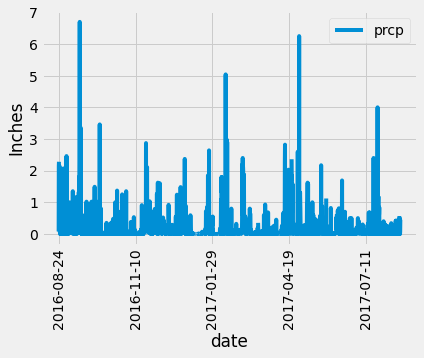

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
yearago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_12_months = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > yearago).\
    order_by(Measurement.date).all() 

# Save the query results as a Pandas DataFrame and set the index to the date column
yearly_prcp_df = pd.DataFrame(last_12_months)
yearly_prcp_df.set_index('date')

# Sort the dataframe by date
yearly_prcp_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
# yearly_prcp_df
prcp_plot = yearly_prcp_df.plot.line(x='date', y='prcp')

plt.ylabel('Inches')
plt.xticks(rotation = 90)
plt.show()



In [66]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yearly_prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [106]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).count()

19550

In [151]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [157]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
print(f""" Lowest: {
    session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()},
highest: {
    session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()},
average: {
    session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()}
    """)

 Lowest: [(54.0,)],
highest: [(85.0,)],
average: [(71.66378066378067,)]
    


In [158]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Find most recent date for most active station id
session.query(Measurement.date).filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).first()

('2017-08-18',)

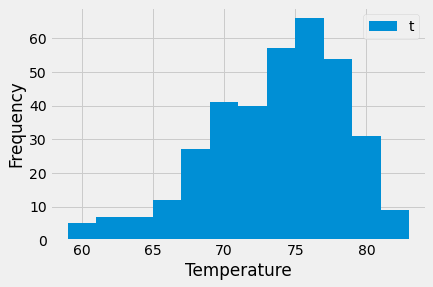

In [176]:
# Calculate the date one year from the last date in data set.
ma_yearago = dt.date(2017, 8, 18) - dt.timedelta(days=365)

# Perform a query to retrieve the data and tobs scores
ma_last_12_months = session.query(Measurement.tobs).\
    filter(Measurement.date > ma_yearago).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all() 

# Save the query results as a Pandas DataFrame and set the index to the date column
ma_yearly_tobs_df = pd.DataFrame(ma_last_12_months)
ma_yearly_tobs_df.set_index('tobs')

# Sort the dataframe by date
ma_yearly_tobs_df.sort_values(by='tobs')

# Use Pandas Plotting with Matplotlib to plot the data
plt.hist(ma_yearly_tobs_df, bins=12)

plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend('tobs')
plt.show()

# Close session

In [177]:
# Close Session
session.close()